In [1]:
from enforce_re import Enforce 
from datetime import datetime
import pandas as pd  

Importing plotly failed. Interactive plots will not work.


Imported auto_timeseries version:0.0.64. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



## House Hold Energy Data - Time Series from kaggle
https://www.kaggle.com/datasets/jaganadhg/house-hold-energy-data/code

In [2]:
energy_data = pd.read_csv('D202.csv')
energy_data.head()

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN


In [3]:
len(energy_data)

70368

In [4]:
energy_data['DATE']

0        10/22/2016
1        10/22/2016
2        10/22/2016
3        10/22/2016
4        10/22/2016
            ...    
70363    10/24/2018
70364    10/24/2018
70365    10/24/2018
70366    10/24/2018
70367    10/24/2018
Name: DATE, Length: 70368, dtype: object

In [5]:
energy_data["DATE_TIME"] = pd.to_datetime(energy_data.DATE + " " + energy_data["END TIME"])
energy_data = energy_data[["DATE_TIME","USAGE"]]

<AxesSubplot:>

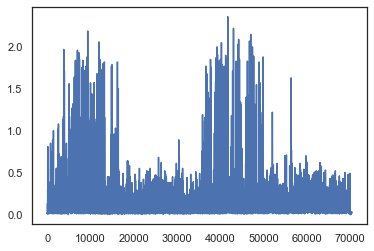

In [6]:
energy_data['USAGE'].plot()

In [8]:
energy_data[0:30000]

,DATE_TIME,USAGE
0,2016-10-22 00:14:00,0.01
1,2016-10-22 00:29:00,0.01
2,2016-10-22 00:44:00,0.01
3,2016-10-22 00:59:00,0.01
4,2016-10-22 01:14:00,0.01
...,...,...
29995,2017-08-30 10:59:00,0.01
29996,2017-08-30 11:14:00,0.02
29997,2017-08-30 11:29:00,0.02
29998,2017-08-30 11:44:00,0.02


Start of Fit.....
    Target variable given as = USAGE
Start of loading of data.....
    Inputs: ts_column = DATE_TIME, sep = ,, target = ['USAGE']
    Using given input: pandas dataframe...
    DATE_TIME column exists in given train data...
    train data shape = (4000, 1)
Alert: Could not detect strf_time_format of DATE_TIME. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model


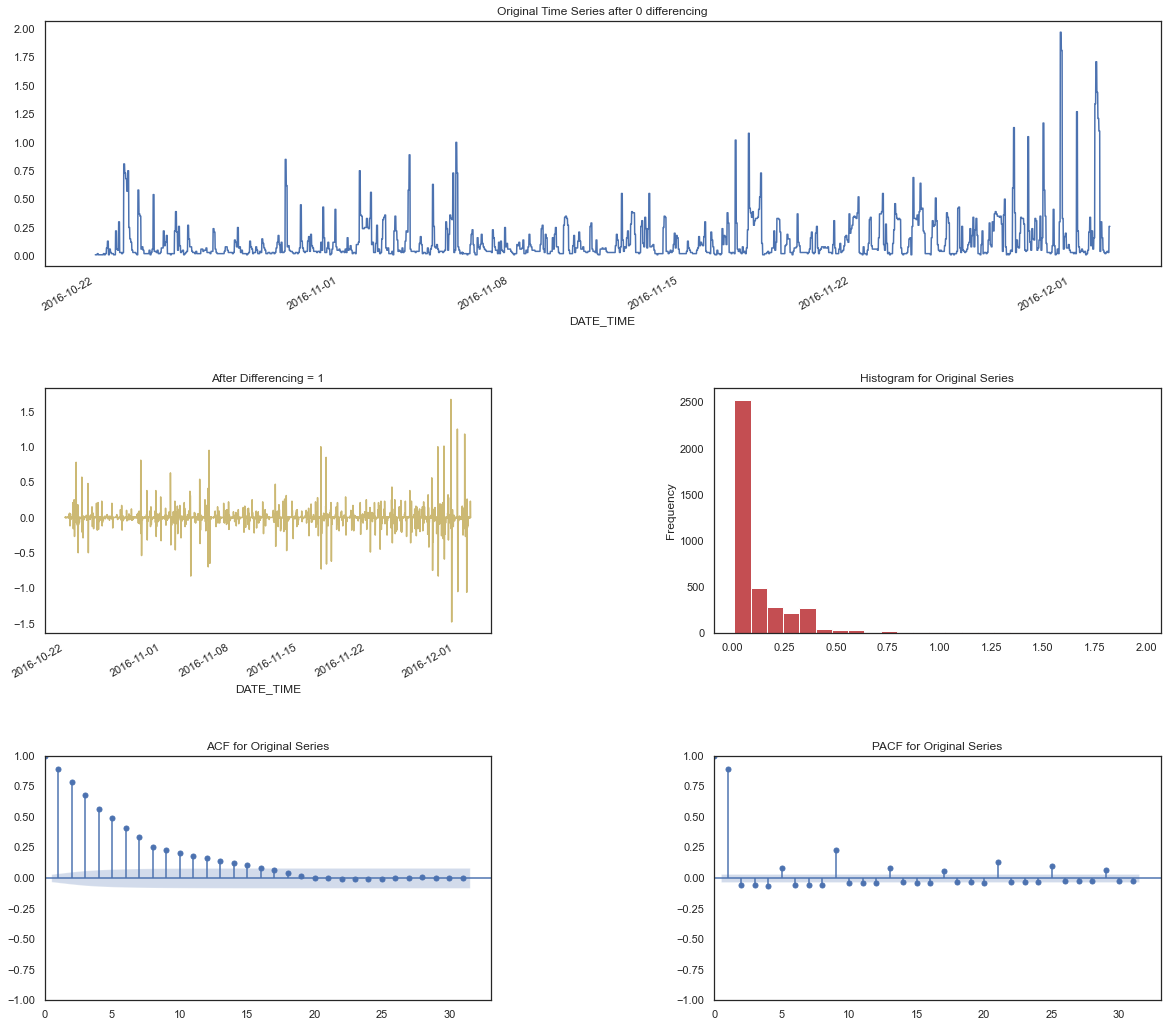

Time Interval is given as B
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(4000, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding daily seasonality to Prophet with period=12, fourier_order=15 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3

Fold Number: 1 --> Train Shape: 3982 Test Shape: 6
    RMSE = 0.29
    Std Deviation of actuals = 0.00
    Normalized RMSE (as pct of std dev) = 6219%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 3988 Test Shape: 6
    RMSE = 0.26
    Std Deviation of actuals = 0.00
    Normalized RMSE (as pct of std dev) = 5533%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 3994 Test Shape: 6
    RMSE = 0.17
    Std Deviation of actuals = 0.11
    Normalized RMSE (as pct of std dev) = 158%
Cross Validation 

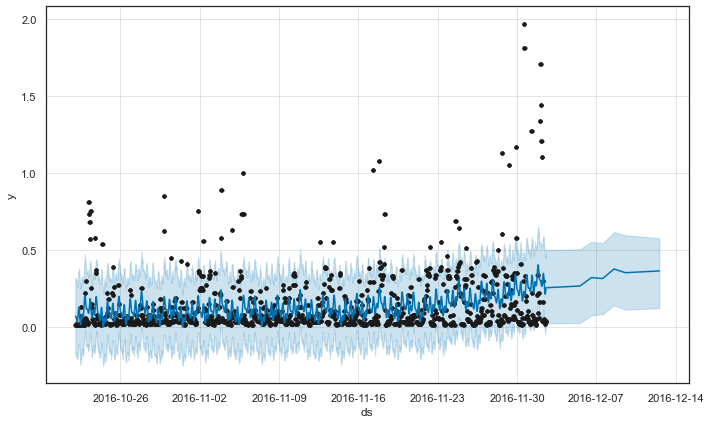

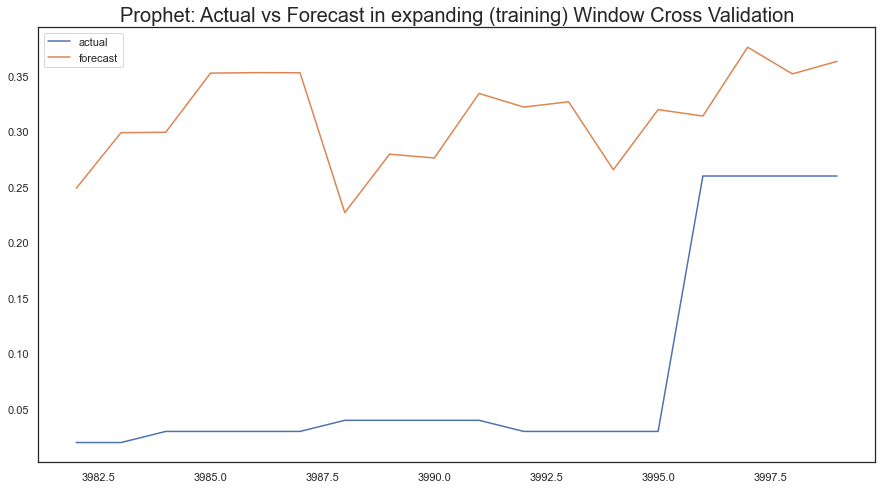

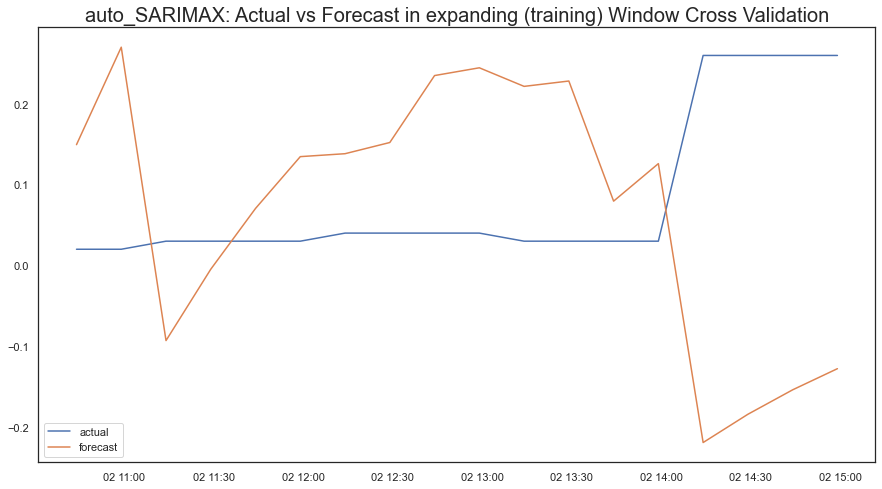

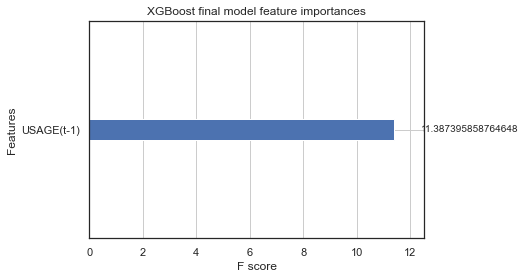

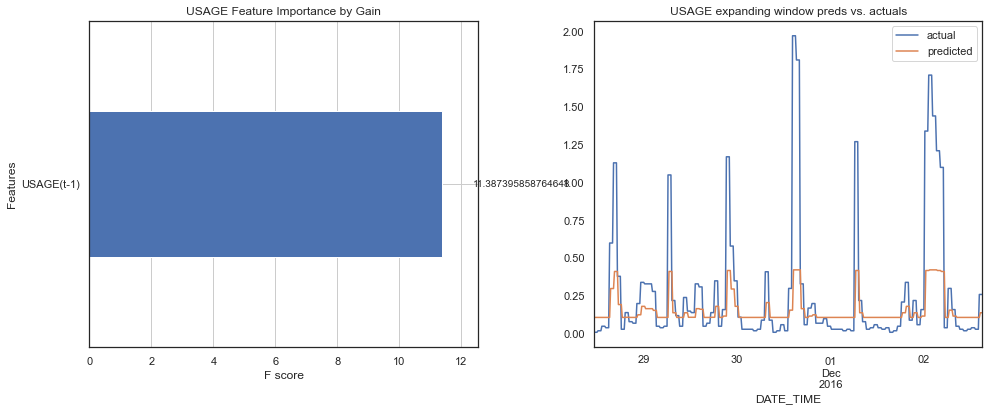

In [19]:
enf = Enforce( raw_data=energy_data[0:5000], target_name='USAGE', ts_name='DATE_TIME',  data_split_ratio=0.8,filtering=True,cv=3)
pred = enf.run()

In [20]:
enf.model.get_cv_scores()

,Model,CV Scores
0,Prophet,0.293153
1,Prophet,0.260846
2,Prophet,0.170769
3,auto_SARIMAX,0.134386
4,auto_SARIMAX,0.172391
5,auto_SARIMAX,0.356104
6,ML,0.360728


In [21]:
enf.test

,DATE_TIME,USAGE
4000,2016-12-02 15:14:00,0.07
4001,2016-12-02 15:29:00,0.07
4002,2016-12-02 15:44:00,0.07
4003,2016-12-02 15:59:00,0.07
4004,2016-12-02 16:14:00,0.05
...,...,...
4995,2016-12-12 23:59:00,0.38
4996,2016-12-13 00:14:00,0.35
4997,2016-12-13 00:29:00,0.35
4998,2016-12-13 00:44:00,0.35


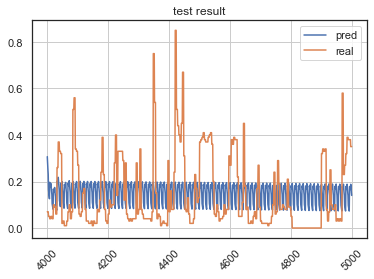

In [24]:
import matplotlib.pyplot as plt 

plt.plot(pred.index,pred['yhat'].values, label='pred')
plt.plot(pred.index, enf.test['USAGE'].values, label='real')
plt.legend()
plt.title("test result")
plt.xticks(rotation =45)
plt.grid()